In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib.ticker import NullFormatter
from collections import Counter
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
KNNdata = pd.read_csv(r"C:\Users\thump\OneDrive\Desktop\Final Project Literature Survey\Data Preprocessing\Preprocesseddata.csv")

In [5]:
KNNdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,1,2,0.256419,1,2,0,5,1,0.011016,1,-1,0,0,2
1,44,3,1,2,2,-0.437895,1,2,0,5,1,-0.416127,1,-1,0,0,2
2,33,8,2,2,2,-0.446762,1,1,0,5,1,-0.707361,1,-1,0,0,2
3,47,1,2,0,2,0.047205,1,2,0,5,1,-0.645231,1,-1,0,0,2
4,33,0,1,0,2,-0.447091,2,2,0,5,1,-0.233620,1,-1,0,0,2


In [6]:
X = KNNdata.drop('y',axis=1).values
#X = X.values
Y = KNNdata.y
print(Counter(Y))

Counter({2: 39922, 1: 5289})


In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [8]:
KNN = KNeighborsClassifier(weights='distance')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4, random_state = 0)

In [12]:
pipeline = Pipeline([('transforming',scalar), ('estimator', KNN)])

In [13]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', KNeighborsClassifier(weights='distance'))])

In [14]:
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics

In [15]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


Accuracy for KNN on Unbalanced dataset is  0.889908764169201
Balanced Accuracy for KNN on Unbalanced dataset is  0.6551812795996383
Recall/Sensitivity for KNN on Unbalanced dataset is  0.3482142857142857
f1_score for KNN on Unbalanced dataset is  0.42672041462712357


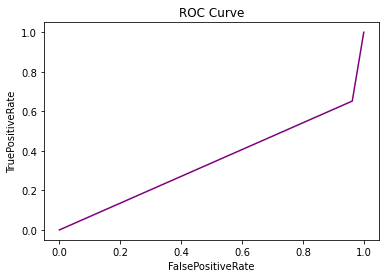

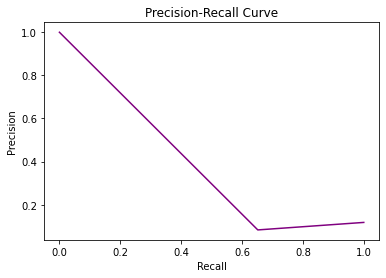

In [16]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on Unbalanced dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on Unbalanced dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on Unbalanced dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on Unbalanced dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

Minimum error:- 0.11257948576168095 at K = 15


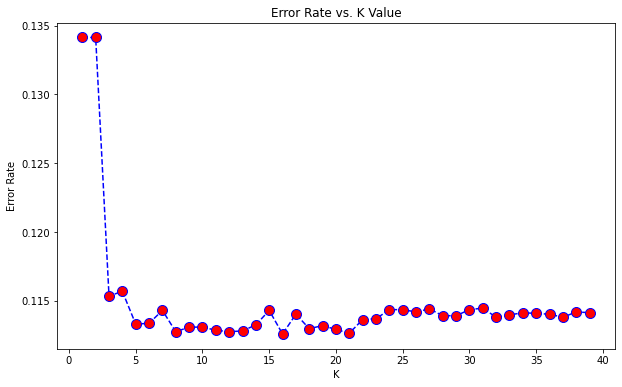

In [17]:
#Code to plot K value vs error rate
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8956593862316837 at K = 28


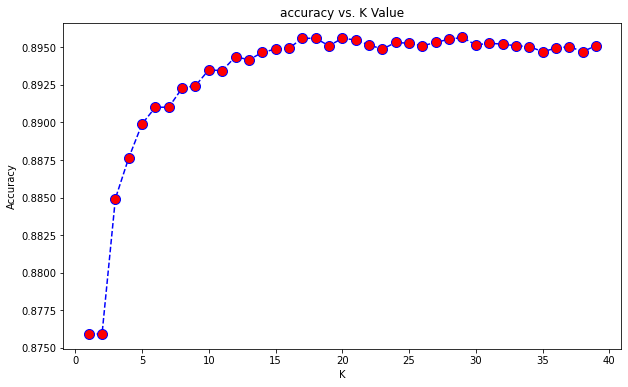

In [25]:
#Code to plot accuracy vs K value
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,weights='distance').fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.balanced_accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [29]:
#training the model with best k 
KNN_bestk = KNeighborsClassifier(n_neighbors=21,weights='distance')
KNN_bestk.fit(x_train,y_train)
y_pred = KNN_bestk.predict(x_test)

In [ ]:
#Evaluation metrics

Accuracy for KNN on Unbalanced dataset is  0.8954935029029583
Balanced Accuracy for KNN on Unbalanced dataset is  0.6357433051985104
Recall/Sensitivity for KNN on Unbalanced dataset is  0.29605263157894735
f1_score for KNN on Unbalanced dataset is  0.39999999999999997


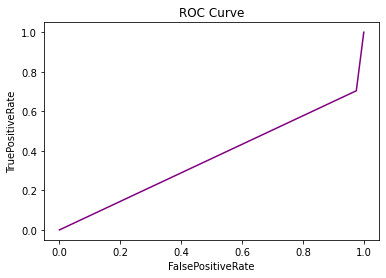

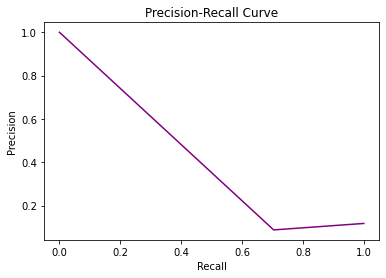

In [30]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on Unbalanced dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on Unbalanced dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on Unbalanced dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on Unbalanced dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Oversampling Minority class using SMOTE

In [18]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [20]:
#increasing minority class to half of majority class
smtknn = SMOTE(sampling_strategy = 0.5,random_state = 0)

In [21]:
X_over,Y_over = smtknn.fit_resample(X,Y)

In [22]:
print(Counter(Y_over))

Counter({2: 39922, 1: 19961})


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size = 0.4, random_state = 0)

In [25]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', KNeighborsClassifier(weights='distance'))])

In [26]:
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics for oversampled minority class

Accuracy for KNN on Oversampled dataset is  0.9023545128162311
Balanced Accuracy for KNN on Oversampled dataset is  0.9019508424459455
Recall/Sensitivity for KNN on Oversampled dataset is  0.9007385154587558
f1_score for KNN on Oversampled dataset is  0.8601996294303986


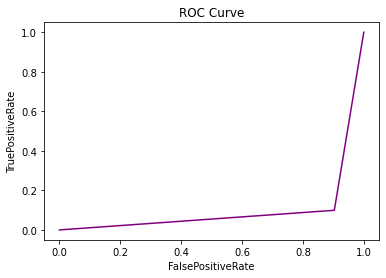

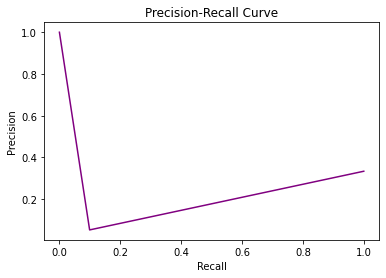

In [27]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on Oversampled dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on Oversampled dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on Oversampled dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on Oversampled dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Cleaning Oversampled data with tomek-links

In [28]:
from imblearn.under_sampling import TomekLinks

In [30]:
tl = TomekLinks(sampling_strategy = 'not majority')
X_over_clean,Y_over_clean = tl.fit_resample(X_over,Y_over)

In [31]:
print(Counter(Y_over_clean))

Counter({2: 39922, 1: 19795})


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_over_clean,Y_over_clean,test_size = 0.4, random_state = 0)

In [33]:
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

Accuracy for KNN on Oversampled and cleaned dataset is  0.9054297316532005
Balanced Accuracy for KNN on Oversampled and cleaned dataset is  0.9056246860865604
Recall/Sensitivity for KNN on Oversampled and cleaned dataset is  0.9062067229006673
f1_score for KNN on Oversampled and cleaned dataset is  0.8643650555388772


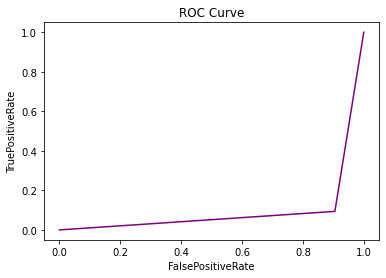

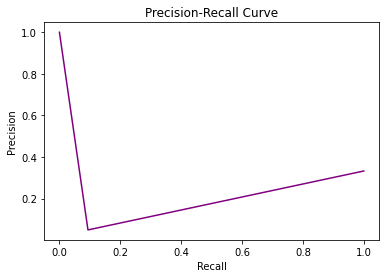

In [34]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on Oversampled and cleaned dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on Oversampled and cleaned dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on Oversampled and cleaned dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on Oversampled and cleaned dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Undersampling majority class using Random Undersampling

In [35]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
randomUnderSample = RandomUnderSampler(sampling_strategy = 0.41 ,random_state = 0)

In [37]:
X_under,Y_under = randomUnderSample.fit_resample(X,Y)
print(Counter(Y_under))

Counter({2: 12900, 1: 5289})


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_under,Y_under,test_size = 0.4, random_state = 0)

In [39]:
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

Accuracy for KNN on Undersampled dataset is  0.8192688290269379
Balanced Accuracy for KNN on Undersampled dataset is  0.7516315056676797
Recall/Sensitivity for KNN on Undersampled dataset is  0.596971177332682
f1_score for KNN on Undersampled dataset is  0.650172918329343


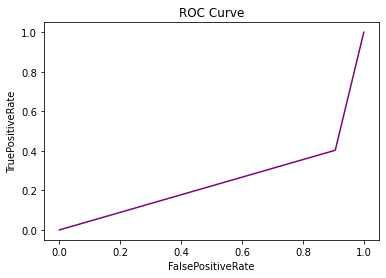

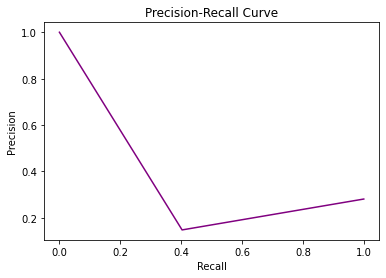

In [40]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on Undersampled dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on Undersampled dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on Undersampled dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on Undersampled dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Cleaning Undersampled majority class using Random Undersampling and tomeklinks

In [41]:
TL_under = TomekLinks(sampling_strategy = 'majority')
X_under_clean,Y_under_clean = TL_under.fit_resample(X_under,Y_under)
print(Counter(Y_under_clean))

Counter({2: 12060, 1: 5289})


In [42]:
x_train,x_test,y_train,y_test = train_test_split(X_under_clean,Y_under_clean,test_size = 0.4, random_state = 0)

In [43]:
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

Accuracy for KNN on Undersampled and cleaned dataset is  0.835878962536023
Balanced Accuracy for KNN on Undersampled and cleaned dataset is  0.7789461642527455
Recall/Sensitivity for KNN on Undersampled and cleaned dataset is  0.6388349514563106
f1_score for KNN on Undersampled and cleaned dataset is  0.6979581012993901


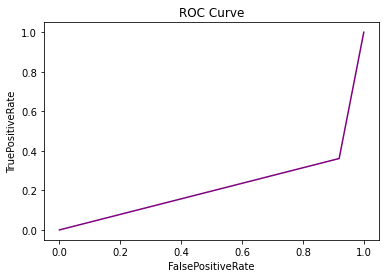

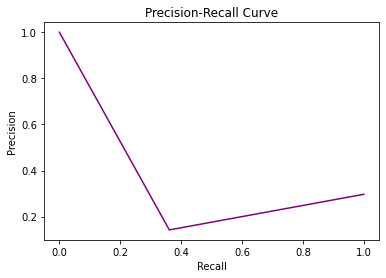

In [44]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on Undersampled and cleaned dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on Undersampled and cleaned dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on Undersampled and cleaned dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on Undersampled and cleaned dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Overall Balanced data

In [45]:
print(Counter(Y))
print(Counter(Y_over))
randomUnderSample_balanced = RandomUnderSampler(sampling_strategy = 1 ,random_state = 0)
X_overall,Y_overall = randomUnderSample_balanced.fit_resample(X_over,Y_over)
print(Counter(Y_overall))
x_train,x_test,y_train,y_test = train_test_split(X_overall,Y_overall,test_size = 0.4, random_state = 0)

Counter({2: 39922, 1: 5289})
Counter({2: 39922, 1: 19961})
Counter({1: 19961, 2: 19961})


In [46]:
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation Metrics for overall Balanced data

Accuracy for KNN on balanced dataset is  0.8968626714258876
Balanced Accuracy for KNN on balanced dataset is  0.8968266631371674
Recall/Sensitivity for KNN on balanced dataset is  0.9410586910274058
f1_score for KNN on balanced dataset is  0.9013004134955355


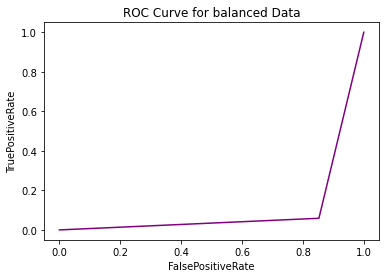

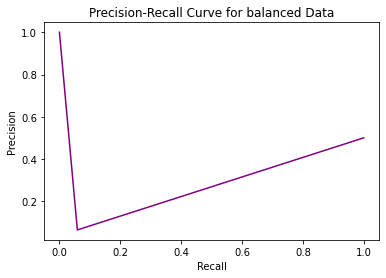

In [47]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on balanced dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on balanced dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on balanced dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on balanced dataset is ",f1score_over)

#ROC CURVE for balanced data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for balanced Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for balanced data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for balanced Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Overall Balanced data-Cleaned

In [48]:
clean_balanced = TomekLinks(sampling_strategy='all')
X_balanced_clean,Y_balanced_clean = clean_balanced.fit_resample(X_overall,Y_overall)
print(Counter(Y_balanced_clean))

Counter({1: 19831, 2: 19831})


In [49]:
x_train,x_test,y_train,y_test = train_test_split(X_balanced_clean,Y_balanced_clean,test_size = 0.4, random_state = 0)

In [50]:
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation Metrics for overall Balanced and cleaned data

Accuracy for KNN on balanced and cleaned dataset is  0.8974472108414749
Balanced Accuracy for KNN on balanced and cleaned dataset is  0.8975590860715195
Recall/Sensitivity for KNN on balanced and cleaned dataset is  0.9408493427704753
f1_score for KNN on balanced and cleaned dataset is  0.9014834998486224


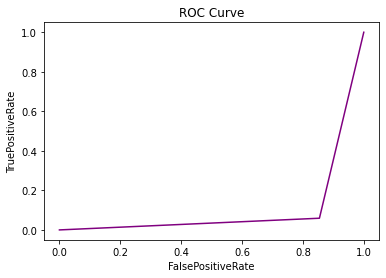

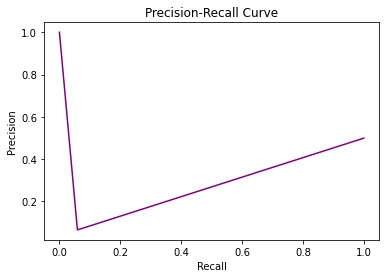

In [51]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for KNN on balanced and cleaned dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for KNN on balanced and cleaned dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for KNN on balanced and cleaned dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for KNN on balanced and cleaned dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
#Serializing the model using sklearn pickle

In [52]:
import pickle
pickle.dump(pipeline,open('knnmodel.pkl','wb'))

In [53]:
pickeled_knn = pickle.load(open('knnmodel.pkl','rb'))

In [54]:
print(pickeled_knn.predict([[31,1,2,3,2,54,1,2,1,18,1,239,6,-1,0,0]]))

[1]
